In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [60]:
# Load metadata (update the relative path)
df = pd.read_csv("../data/metadata.csv")

In [61]:
# Convert filepath column to absolute path
df['filepath_abs'] = df['filepath'].apply(lambda x: os.path.abspath(os.path.join("..", x)))

In [62]:
# 1. Class Distribution Plot
def plot_class_distribution(df):
    class_split_counts = df.groupby(['class', 'split']).size().reset_index(name='count')
    plt.figure(figsize=(12, 5))
    sns.barplot(data=class_split_counts, x='class', y='count', hue='split')
    plt.title('Class Distribution by Split')
    plt.ylabel('Image Count')
    plt.xlabel('Class')
    plt.show()

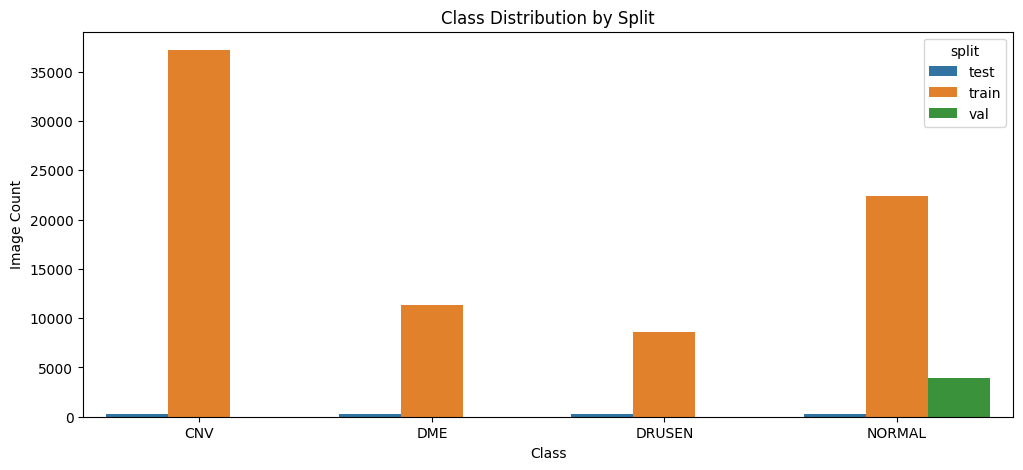

In [63]:
plot_class_distribution(df)

In [64]:
# 2. Show Sample Images
def show_samples(df, class_names, split='train', samples_per_class=5):
    fig, axes = plt.subplots(len(class_names), samples_per_class, figsize=(samples_per_class * 2, len(class_names) * 2))
    for i, cls in enumerate(class_names):
        subset = df[(df['class'].str.lower() == cls.lower()) & (df['split'] == split)]
        files = subset.sample(min(samples_per_class, len(subset)))['filepath_abs'].values
        for j, path in enumerate(files):
            img = cv2.imread(path)
            ax = axes[i, j]
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                ax.imshow(img)
            else:
                ax.text(0.5, 0.5, 'Image not found', ha='center', va='center')
            ax.axis('off')
        # Add class label to the leftmost image of each row
        axes[i, 0].set_ylabel(cls.upper(), fontsize=12)
    plt.tight_layout()
    plt.show()

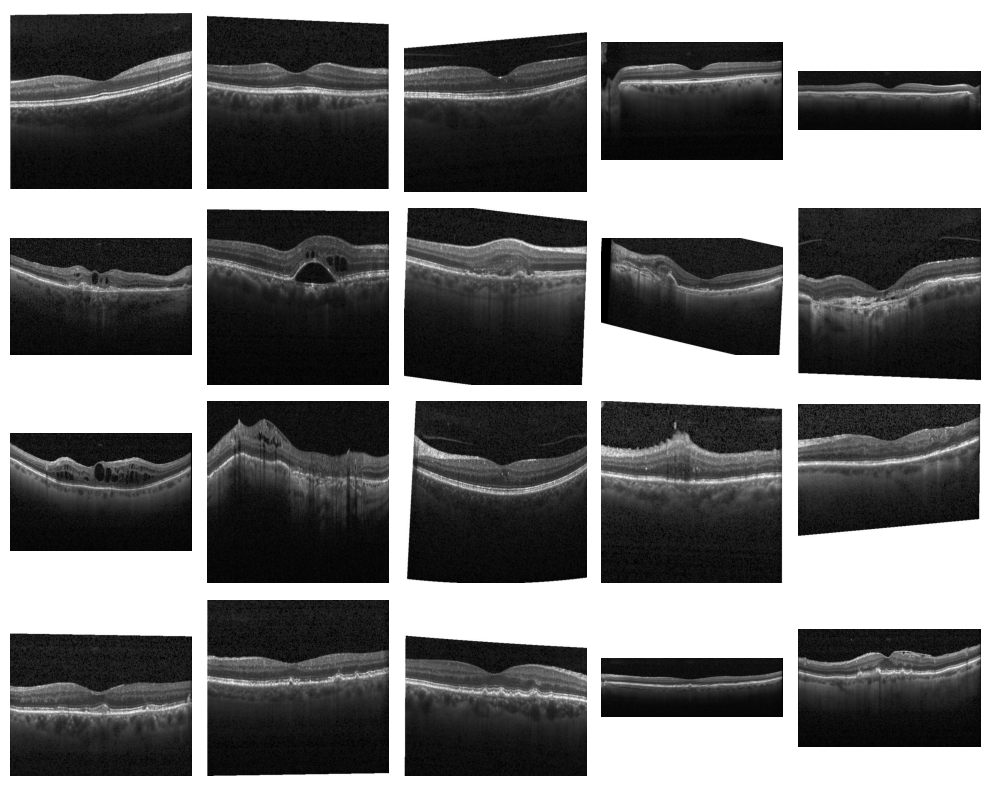

In [66]:
show_samples(df, class_names=['normal', 'cnv', 'dme', 'drusen'], split='train', samples_per_class=5)

In [67]:
# 3. Pixel Intensity Distribution
def plot_pixel_distribution(df, sample_size=100):
    sample_paths = df.sample(min(sample_size, len(df)))['filepath_abs'].values
    pixel_values = []
    for path in sample_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            pixel_values.extend(img.flatten())
    plt.figure(figsize=(8, 4))
    sns.histplot(pixel_values, bins=50, kde=True, color='steelblue')
    plt.title('Pixel Intensity Distribution (Grayscale)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

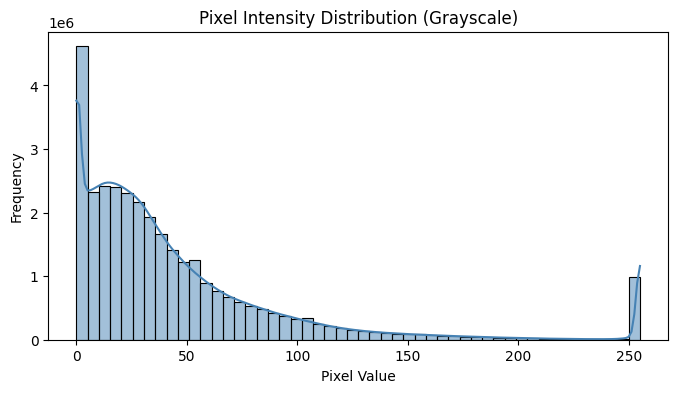

In [68]:
plot_pixel_distribution(df)

In [69]:
# 4. Image Shape Distribution
def print_image_shapes(df, sample_size=500):
    sample_paths = df.sample(min(sample_size, len(df)))['filepath_abs'].values
    shapes = []
    for path in sample_paths:
        img = cv2.imread(path)
        if img is not None:
            shapes.append(img.shape)
    shape_df = pd.DataFrame(shapes, columns=['height', 'width', 'channels'])
    shape_counts = shape_df.value_counts().reset_index(name='count')
    return shape_counts

In [70]:
shape_counts = print_image_shapes(df)
print(shape_counts)

   height  width  channels  count
0     496    512         3    229
1     496    768         3    138
2     512    512         3     80
3     496   1536         3     53
